# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

- Tipo de vivienda, pues es distinto valuar un departamento que una casa, por ejemplo.
- Ubicación, para conocer el valor del terreno sobre el que está construido el inmueble.
- Edad del inmueble, pues con el tiempo el valor de la construcción se deprecia.
- Materiales utilizados para su construcción, pues a mayor calidad de estos mayor será el precio de venta.
- Metros construidos y metros de terreno, para poder valuar ambos.
- Lugares de estacionamiento y sus medidas, en el caso de departamentos, pues estos tienen un valor agregado al inmueble.
- Características del vecindario, pues estas pesan fuertemente en la deseabilidad de la vivienda y, por lo tanto, en su plusvalía.
- Movimientos macroeconómicos de la ciudad que impliquen llegada o retirada de grandes empresas, pues estas mueven mucho recurso humano que impacta en el nivel de demanda de vivienda en la localidad (poca oferta y mucha demanda de vivienda potencialmente elevaría el precio de venta de un inmueble y viceversa).

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [219]:
df = pd.read_csv('/Users/josepozo/Downloads/DS_Proyecto_01_Datos_Properati.csv')

In [220]:
df.shape

(146660, 19)

In [221]:
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [222]:
list(df.columns)

['start_date',
 'end_date',
 'created_on',
 'lat',
 'lon',
 'l1',
 'l2',
 'l3',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'price',
 'currency',
 'title',
 'description',
 'property_type',
 'operation_type']

In [223]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [224]:
# Para saber qué tipos de propiedad hay publicados:
types = df['property_type'].unique()
print(list(types))

['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']


In [225]:
# Para saber cuántos tipos de propiedad hay publicados:
df['property_type'].nunique()

10

In [226]:
# Para saber cuántas instancias por cada tipo de propiedad hay publicadas:
count = df['property_type'].value_counts()
count

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Text(0, 0.5, 'Publicaciones')

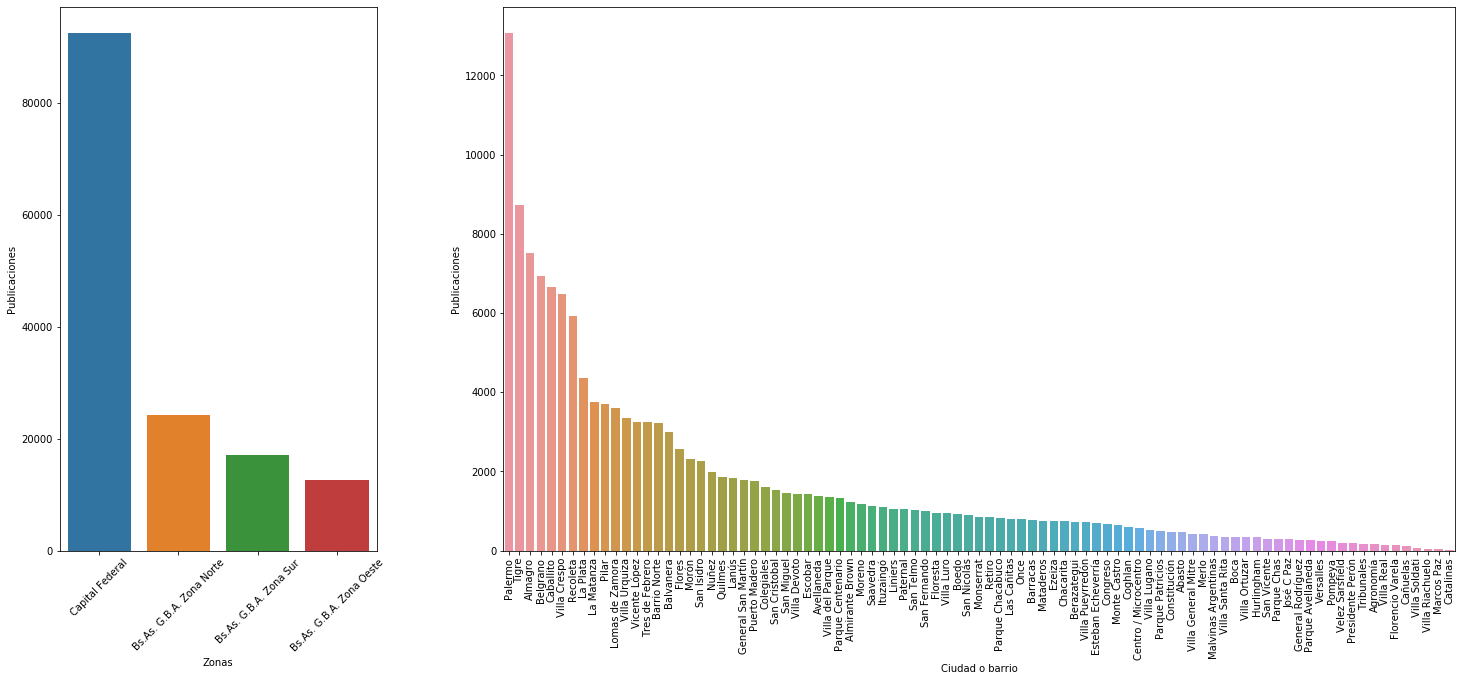

In [227]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (25, 10))
gs = gridspec.GridSpec(1, 2, width_ratios = [1, 3])
ax1 = plt.subplot(gs[0])
sns.countplot(data = df, order = df['l2'].value_counts().index, x = 'l2')
plt.xticks(rotation = 45)
plt.xlabel('Zonas')
plt.ylabel('Publicaciones')
ax2 = plt.subplot(gs[1])
sns.countplot(data = df, order = df['l3'].value_counts().index, x = 'l3')
plt.xticks(rotation = 90)
plt.xlabel('Ciudad o barrio')
plt.ylabel('Publicaciones')

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [228]:
# Para obtener las tres clases más abundantes de tipos de propiedad:
top_properties = count[:3].index.tolist()
top_properties

['Departamento', 'Casa', 'PH']

In [229]:
# Para obtener la región con más propiedades publicadas:
top_region = df['l2'].value_counts()[:1].index.tolist()
top_region

['Capital Federal']

In [230]:
# Creando un nuevo DataFrame que cumpla con las condiciones anteriores:
df1 = df.loc[(df['l2'].isin(top_region)) & df['property_type'].isin(top_properties)]
df1.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [231]:
# Para simplificar el Dataset, eliminaré las columnas que ya no se utilizarán:
df2 = df1.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'currency', 'title',
                'description', 'operation_type'], axis = 1)

In [232]:
# Filtraré aquellas instancias que no tengan valor en alguna columna, si es que las hay:
df2.dropna(how = 'any')

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...
146554,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


In [233]:
# Para obtener estadísticos relevantes de cada variable:
df2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Algunos estadísticos de la tabla anterior que para estudiar la base de datos en general quizá no hacen mucho sentido son, por ejemplo, aquellos de los renglones <b>max</b> y <b>min</b>. Tampoco es de gran ayuda saber que el promedio de baños sea 1,56.

In [234]:
# Filtraré aquellas instancias cuya superficie total sea estrictamente menor que la superficie cubierta, si es que
# las hay:
df3 = df2.loc[df2['surface_total'] >= df2['surface_covered']]

Text(0, 0.5, 'Superficie total')

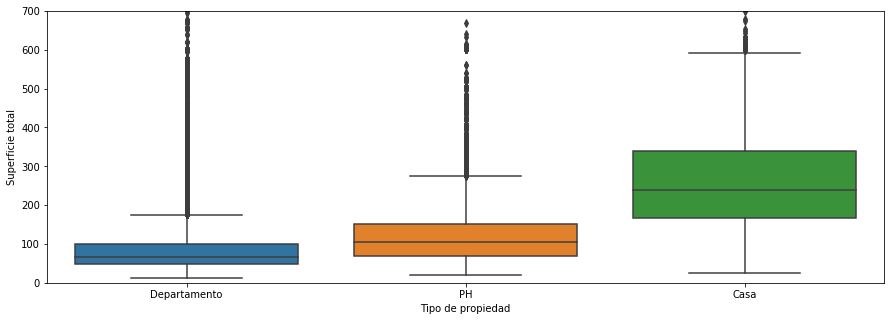

In [235]:
# Para determinar rangos razonables de superficies, nos basaremos en el siguiente Boxplot:
plt.figure(figsize = (15, 5))
ax = sns.boxplot(x = 'property_type', y = 'surface_total', data = df3)
ax.set(ylim = (0, 700))
plt.xlabel('Tipo de propiedad')
plt.ylabel('Superficie total')

Del anterior Boxplot, <b>tomando como criterio eliminar los <i>outliers</i></b>, se desprende que el rango adecuado para <b>Departamentos</b> es 10 - 176, para <b>PH</b> es 20 - 277 y para <b>Casa</b> es 25 - 595. Luego, para las propiedades en general el rango adecuado es 10 - 595.

In [236]:
# Para filtrar el DataFrame por este rango de superficie total para todo tipo de propiedad:
df4 = df3.loc[df3['surface_total'] <= 595]
df5 = df4.loc[df4['surface_total'] >= 10]

Text(0, 0.5, 'Precio')

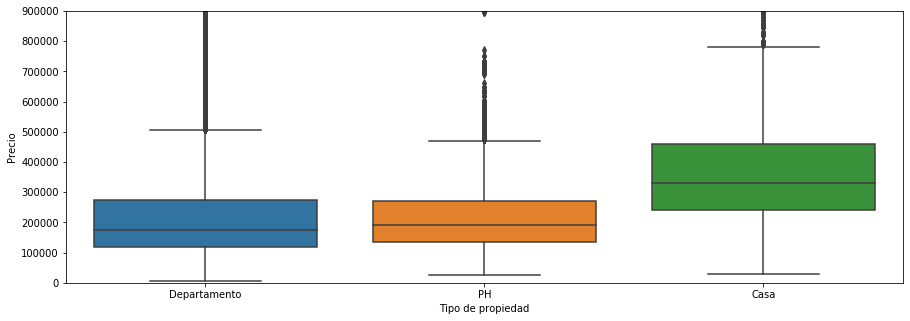

In [237]:
# Para determinar rangos razonables de precios, nos basaremos en el siguiente Boxplot:
plt.figure(figsize = (15, 5))
ax = sns.boxplot(x = 'property_type', y = 'price', data = df5)
ax.set(ylim = (0, 900000))
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')

Del anterior Boxplot, <b>tomando como criterio eliminar los <i>outliers</i></b>, se desprende que el rango adecuado para <b>Departamentos</b> es 4,000 - 510,000, para <b>PH</b> es 26,500 - 473,500 y para <b>Casa</b> es 27,000 - 785,000. Luego, para las propiedades en general el rango adecuado es 4,000 - 785,000.

<b>Obs:</b> Lo que se considere como un 'rango razonable' dependerá, entre otras cosas, de las necesidades particulares del cliente. Para este caso se optó por eliminar los <i>outliers</i>; sin embargo, exiten otros criterios aplicables para obtener estos rangos.

In [238]:
# Para filtrar el DataFrame por este rango de precio para todo tipo de propiedad:
df6 = df5.loc[df5['price'] <= 785000]
df7 = df6.loc[df6['price'] >= 4000]

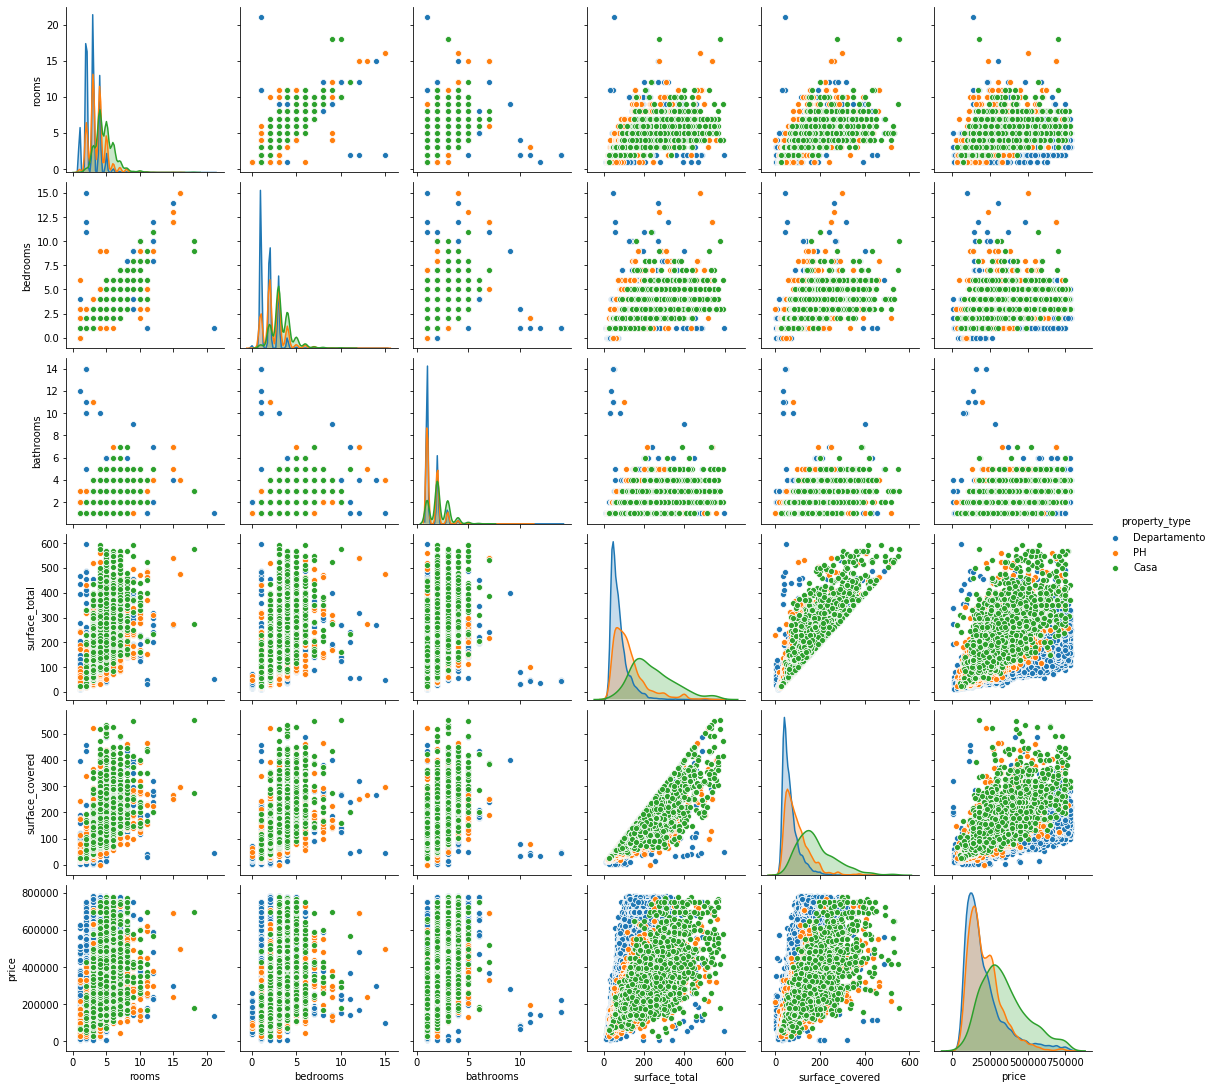

In [239]:
properties = sns.pairplot(df7, hue = "property_type")

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [240]:
# Para ver cómo están correlacionadas las variables, independientemente del tipo de propiedad:
df7.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.931624,0.571016,0.724728,0.777083,0.581960
bedrooms,0.931624,1.000000,0.575562,0.706819,0.758576,0.557760
bathrooms,0.571016,0.575562,1.000000,0.585890,0.641062,0.655729
surface_total,0.724728,0.706819,0.585890,1.000000,0.917077,0.683213
surface_covered,0.777083,0.758576,0.641062,0.917077,1.000000,0.737509
price,0.581960,0.557760,0.655729,0.683213,0.737509,1.000000


In [241]:
# Para ver cómo están correlacionadas las variables en los departamentos:
df7.loc[df7['property_type'] == 'Departamento'].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.927670,0.571188,0.745701,0.792407,0.598276
bedrooms,0.927670,1.000000,0.580074,0.728156,0.774008,0.573655
bathrooms,0.571188,0.580074,1.000000,0.663740,0.684409,0.668671
surface_total,0.745701,0.728156,0.663740,1.000000,0.932888,0.784877
surface_covered,0.792407,0.774008,0.684409,0.932888,1.000000,0.802657
price,0.598276,0.573655,0.668671,0.784877,0.802657,1.000000


In [242]:
# Para ver cómo están correlacionadas las variables en los PH:
df7.loc[df7['property_type'] == 'PH'].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.926335,0.550830,0.633482,0.696285,0.564856
bedrooms,0.926335,1.000000,0.536945,0.614022,0.680817,0.554358
bathrooms,0.550830,0.536945,1.000000,0.480464,0.557923,0.548920
surface_total,0.633482,0.614022,0.480464,1.000000,0.847974,0.681923
surface_covered,0.696285,0.680817,0.557923,0.847974,1.000000,0.735981
price,0.564856,0.554358,0.548920,0.681923,0.735981,1.000000


In [243]:
# Para ver cómo están correlacionadas las variables en las casas:
df7.loc[df7['property_type'] == 'Casa'].corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.840915,0.464864,0.471017,0.550051,0.392027
bedrooms,0.840915,1.000000,0.503631,0.454762,0.533568,0.341603
bathrooms,0.464864,0.503631,1.000000,0.473947,0.560260,0.500445
surface_total,0.471017,0.454762,0.473947,1.000000,0.848112,0.618202
surface_covered,0.550051,0.533568,0.560260,0.848112,1.000000,0.642392
price,0.392027,0.341603,0.500445,0.618202,0.642392,1.000000


En cualquier caso, las mejores variables para predecir el precio son <b>superficie cubierta</b> y <b>superficie total</b> pues son, en ese orden, las que tienen mayor correlación con la variable <b>precio</b>.

La <b>superficie total</b> y su correlación con <b>precio</b> son inversamente proporcionales.

A diferencia de las casas y los departamentos, en los que la mejor correlación se da entre las variables <b>superficie total</b> y <b>superficie cubierta</b>, en los PH la mejor correlación ocurre entre las variables <b>cuartos</b> y <b>recámaras</b>.

### 2.1 Desafío

Vamos a obtener el <b>promedio de precios</b> en cada zona del Dataset original:

In [244]:
# Para obtener el promedio de precios en la zona 'Capital Federal':
df8 = df.loc[df['l2'] == 'Capital Federal', ['price']]
df8.mean()

price    261272.120209
dtype: float64

In [245]:
# Para obtener el promedio de precios en la zona 'Bs.As. G.B.A. Zona Oeste':
df9 = df.loc[df['l2'] == 'Bs.As. G.B.A. Zona Oeste', ['price']]
df9.mean()

price    156328.917259
dtype: float64

In [246]:
# Para obtener el promedio de precios en la zona 'Bs.As. G.B.A. Zona Norte':
df10 = df.loc[df['l2'] == 'Bs.As. G.B.A. Zona Norte', ['price']]
df10.mean()

price    241528.786879
dtype: float64

In [247]:
# Para obtener el promedio de precios en la zona 'Bs.As. G.B.A. Zona Sur':
df11 = df.loc[df['l2'] == 'Bs.As. G.B.A. Zona Sur', ['price']]
df11.mean()

price    195350.772783
dtype: float64

In [248]:
# Ahora, hagamos un DataFrame con esta información para que sea fácilmente consumible:
datos = {'Zonas':['Capital Federal', 'Zona Norte', 'Zona Sur', 'Zona Oeste'], 'Promedio de precios':
        [df8.mean().values[0], df10.mean().values[0], df11.mean().values[0], df9.mean().values[0]]}
df12 = pd.DataFrame(datos)
df12

,Zonas,Promedio de precios
0,Capital Federal,261272.120209
1,Zona Norte,241528.786879
2,Zona Sur,195350.772783
3,Zona Oeste,156328.917259


### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

In [249]:
# Filtraré el Dataset de acuerdo a los criterios solicitados:
fil_df = df1[(df1['surface_total'] >= 15) & (df1['surface_total'] <= 1000)]
filt_df = fil_df[fil_df['price'] <= 4000000]
filter_df = filt_df.drop(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'currency',
                          'title', 'description', 'operation_type', 'property_type'], axis = 1)
filtered_df = filter_df.dropna()
filtered_df.shape

(81019, 6)

Veamos ahora cómo están correlacionadas las variables en este Dataset.

In [250]:
filtered_df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


<b>Consideración:</b> En todos los modelos que se estudiarán se tomará como métrica el <b>MAE</b>. Esto, debido a la cantidad de <i>outliers</i> en nuestro Dataset y que esta métrica es menos suscptible a ellos que otras.

Nuestros primeros modelos se construirán tomando como variables independientes a todas, excepto <i>precio</i>.

In [251]:
X = filtered_df.drop('price', axis = 1)
y = filtered_df['price']

Ahora, separemos $X$ e $y$, tomando un 70% para entrenamiento y un 30% para evaluación (de la literatura investigada, es la proporción recomendada).

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Nuestro primer modelo será un <b>árbol de decisión</b>. Para determinar qué profundidad usaremos, evaluaremos varias posibilidades.

In [253]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

mae_t_train = []
mae_t_test = []

depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for d in depth:
    tree_regressor = DecisionTreeRegressor(max_depth = d)
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    tree_mae_train = mean_absolute_error(y_train, y_train_pred)
    tree_mae_test = mean_absolute_error(y_test, y_test_pred)
    
    mae_t_train.append(tree_mae_train)
    mae_t_test.append(tree_mae_test)
    
print('El error absoluto promedio en el entrenamiento, para cada profunidad, es:\n')
print(mae_t_train)
print('El error absoluto promedio en la prueba, para cada profunidad, es:\n')
print(mae_t_test)

El error absoluto promedio en el entrenamiento, para cada profunidad, es:

[130177.0397831735, 105972.16468721756, 91755.22893374825, 83900.64847117213, 78424.06217478504, 75063.57655792731, 71557.64602050939, 67868.56374315161, 64041.58439559471, 59878.98141065424, 55424.326258810615, 50458.10254420074, 45944.6598585958, 41616.54242323669, 37661.72223344317]
El error absoluto promedio en la prueba, para cada profunidad, es:

[130856.9487988005, 106136.06255693486, 92176.56989793574, 84046.01405007039, 78655.21267339181, 75906.90962061958, 73686.94337750513, 71695.7457701181, 70479.53431655197, 68363.56837704369, 65824.7669337923, 63747.60601635563, 61308.053253855025, 59464.1056652953, 57777.86428877652]


Veamos ahora cómo es el histograma de los errores ($y - y_{predicho}$) así como el gráfico de dispersión de $y$ contra $y_{predicho}$ para el conjunto de test.

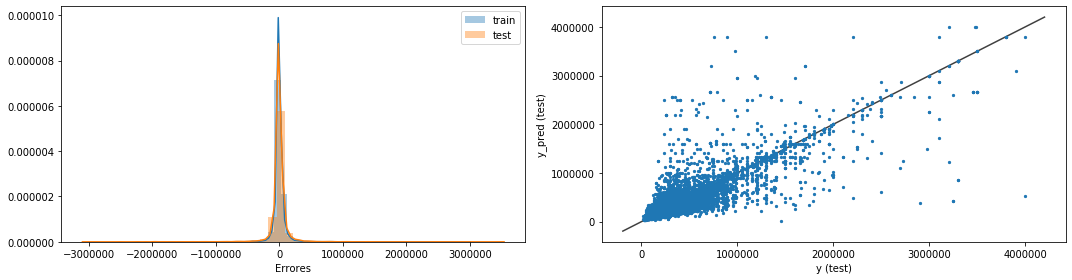

In [254]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s = 5)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
       ]
    
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Veamos en una gráfica cómo son las curvas del MAE de entrenamiento y de evaluación.

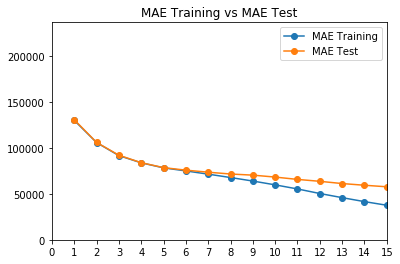

In [255]:
%matplotlib inline
plt.plot(range(1, 16, 1), mae_t_train, 'o-', label = 'MAE Training')
plt.plot(range(1, 16, 1), mae_t_test, 'o-', label = 'MAE Test')
plt.xticks(range(0,max(depth) + 1, 1))
plt.xlim((0, max(depth)))
plt.ylim((0, 237000))
plt.legend(loc = 'best')
plt.title('MAE Training vs MAE Test')
plt.show()

**Conclusiones sobre este modelo:**

- Se considera que la mejor profunidad para el árbol de decisión es de 3.

- Tomando como modelo <i>benchmark</i> el árbol de decisión con profundidad 1, el modelo seleccionado (<b>depth = 3</b>) es mejor pues su MAE es significativamente menor.

In [256]:
print(f'{mae_t_test[1]} < {mae_t_test[0]}')

106136.06255693486 < 130856.9487988005


Ahora, como segundo modelo tomaremos el de <b>vecinos más cercanos</b>. Para determinar el número óptimo de vecinos, evaluaremos distintas posibiliades.

In [257]:
from sklearn.neighbors import KNeighborsRegressor

mae_n_train = []
mae_n_test = []

neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors = n)
    knn_regressor.fit(X_train, y_train)
    
    y_train_predict = knn_regressor.predict(X_train)
    y_test_predict = knn_regressor.predict(X_test)
    
    knn_mae_train = mean_absolute_error(y_train, y_train_predict)
    knn_mae_test = mean_absolute_error(y_test, y_test_predict)
    
    mae_n_train.append(knn_mae_train)
    mae_n_test.append(knn_mae_test)
    
print('El error absoluto promedio en el entrenamiento, para cada número de vecinos, es:\n')
print(mae_n_train)
print('El error absoluto promedio en la prueba, para cada número de vecinos, es:\n')
print(mae_n_test)

El error absoluto promedio en el entrenamiento, para cada número de vecinos, es:

[29233.523336801085, 38901.01056195229, 44645.38687191061, 48467.79881596812, 51403.23151305698, 53440.76482464338, 55161.9426334602, 56680.55617980005, 58071.975034138755, 59261.74355615115, 60287.26293795073, 61243.842763857785, 62104.52660697791, 62863.047472108934, 63600.906428273345]
El error absoluto promedio en la prueba, para cada número de vecinos, es:

[59475.21414465564, 60727.39251625113, 61850.059573767794, 62538.338013247754, 63545.00963548095, 64207.33262020351, 64860.561448672284, 65337.176427631035, 65910.14811157738, 66242.95558709784, 66542.47581966294, 66809.78160742203, 67272.68625030857, 67760.15888199268, 68188.39236128253]


Veamos ahora cómo es el histograma de los errores ($y - y_{predicho}$) así como el gráfico de dispersión de $y$ contra $y_{predicho}$ para el conjunto de test.

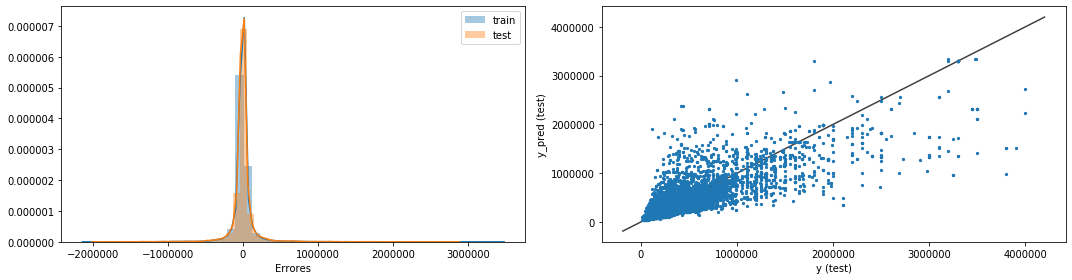

In [258]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.distplot(y_train - y_train_predict, bins = 50, label = 'train')
sns.distplot(y_test - y_test_predict, bins = 50, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s = 5)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
       ]
    
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Veamos en una gráfica cómo son las curvas del MAE de entrenamiento y de evaluación.

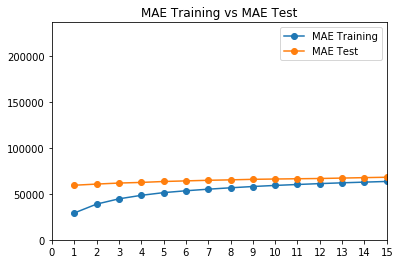

In [259]:
%matplotlib inline
plt.plot(range(1, 16, 1), mae_n_train, 'o-', label = 'MAE Training')
plt.plot(range(1, 16, 1), mae_n_test, 'o-', label = 'MAE Test')
plt.xticks(range(0, max(neighbors) + 1, 1))
plt.xlim((0, max(neighbors)))
plt.ylim((0, 237000))
plt.legend(loc = 'best')
plt.title('MAE Training vs MAE Test')
plt.show()

**Conclusiones sobre este modelo:**
- El número de vecinos adecuado para nuestro modelo es de 4. Si bien es cierto que conforme aumentamos este número las diferencias de los MAE disminuyen, a partir de 4 estas disminuyen muy lentamente por lo que se considera que aumentar los vecinos a partir de este punto nos podría dar una relación costo-beneficio desfavorable.
- Tomando como modelo <i>benchmark</i> este modelo con número de vecinos igual a 1, el modelo seleccionado (<b>n_neighbors = 4</b>) es mejor pues su MAE es significativamente menor.

In [260]:
print(f'{mae_n_test[3]} < {mae_n_test[0]}')

62538.338013247754 < 59475.21414465564


## Conclusiones

- Con las variables consideradas y de acuerdo a la métrica empleada, <b>el modelo que más se aproxima a nuestros datos es el de árbol de decisión</b> pues el error es menor.

In [261]:
tree_5 = abs(mae_t_train[2] - mae_t_test[2])
knn_5 = abs(mae_n_train[3] - mae_n_test[3])

print(f'El error para el modelo de árbol de decisón es {tree_5}')
print(f'El error para el modelo de vecinos más cercanos es {knn_5}')

El error para el modelo de árbol de decisón es 421.3409641874896
El error para el modelo de vecinos más cercanos es 14070.539197279635


# Modificando las variables

<b>1.-</b> Veamos ahora cómo cambian nuestros modelos modificando las variables independientes. Veamos qué ocurre si consideramos únicamente la <i>superficie total, baños</i> y <i>ambientes</i> que son las tres que guardan más correlación con la variable objetivo.

In [262]:
X = filtered_df.drop(['price', 'bedrooms', 'surface_covered'], axis = 1)
y = filtered_df['price']

Como antes, separemos $X$ e $y$, tomando un 70% para entrenamiento y un 30% para evaluación.

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Veamos cómo cambia el modelo de <b>árbol de decisión</b>. Nuevamente, para determinar qué profundidad usaremos evaluaremos varias posibilidades.

In [264]:
mae_t_train = []
mae_t_test = []

depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for d in depth:
    tree_regressor = DecisionTreeRegressor(max_depth = d)
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    tree_mae_train = mean_absolute_error(y_train, y_train_pred)
    tree_mae_test = mean_absolute_error(y_test, y_test_pred)
    
    mae_t_train.append(tree_mae_train)
    mae_t_test.append(tree_mae_test)
    
print('El error absoluto promedio en el entrenamiento, para cada profunidad, es:\n')
print(mae_t_train)
print('El error absoluto promedio en la prueba, para cada profunidad, es:\n')
print(mae_t_test)

El error absoluto promedio en el entrenamiento, para cada profunidad, es:

[133873.9793162091, 108453.07641415237, 94988.25056303116, 89041.4082101747, 84607.43092819588, 81680.20073598088, 79027.5909172066, 76386.36906972043, 73115.28762583171, 70092.72883520673, 66948.68359859621, 63913.21771104913, 61417.36049439977, 59008.7910041321, 57490.7919312507]
El error absoluto promedio en la prueba, para cada profunidad, es:

[132340.83533089055, 106538.10959498817, 93239.48462582166, 87552.39843905337, 83369.65323998866, 81570.21374339747, 79683.03448918746, 77578.67908211549, 75441.07480950082, 73524.05177837118, 72082.36653442301, 70861.0665765181, 69729.85483429943, 68452.84132935217, 68127.72069185023]


Veamos ahora cómo es el histograma de los errores ($y - y_{predicho}$) así como el gráfico de dispersión de $y$ contra $y_{predicho}$ para el conjunto de test.

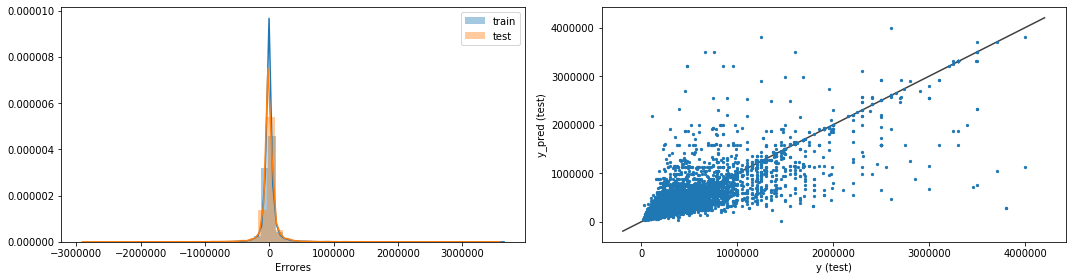

In [265]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s = 5)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
       ]
    
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Veamos en una gráfica cómo son las curvas del MAE de entrenamiento y de evaluación.

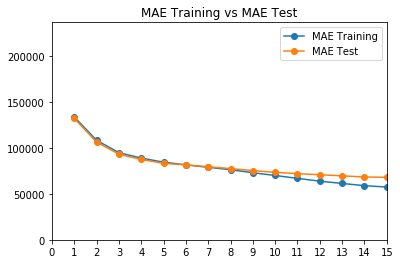

In [266]:
%matplotlib inline
plt.plot(range(1, 16, 1), mae_t_train, 'o-', label = 'MAE Training')
plt.plot(range(1, 16, 1), mae_t_test, 'o-', label = 'MAE Test')
plt.xticks(range(0,max(depth) + 1, 1))
plt.xlim((0, max(depth)))
plt.ylim((0, 237000))
plt.legend(loc = 'best')
plt.title('MAE Training vs MAE Test')
plt.show()

**Conclusiones sobre este modelo:**
- Como en el anterior árbol de decisión, se considera que la mejor profundidad es de 3.
- Tomando como modelo <i>benchmark</i> el árbol de decisión con profundidad 1, el modelo seleccionado (<b>depth = 3</b>) es mejor pues su MAE es menor.

In [267]:
print(f'{mae_t_test[2]} < {mae_t_test[0]}')

93239.48462582166 < 132340.83533089055


Ahora, tomemos el modelo de <b>vecinos más cercanos</b>. Para determinar el número óptimo de vecinos, evaluaremos varias posibilidades.

In [268]:
mae_n_train = []
mae_n_test = []

neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors = n)
    knn_regressor.fit(X_train, y_train)
    
    y_train_predict = knn_regressor.predict(X_train)
    y_test_predict = knn_regressor.predict(X_test)
    
    knn_mae_train = mean_absolute_error(y_train, y_train_predict)
    knn_mae_test = mean_absolute_error(y_test, y_test_predict)
    
    mae_n_train.append(knn_mae_train)
    mae_n_test.append(knn_mae_test)
    
print('El error absoluto promedio en el entrenamiento, para cada número de vecinos, es:\n')
print(mae_n_train)
print('El error absoluto promedio en la prueba, para cada número de vecinos, es:\n')
print(mae_n_test)

El error absoluto promedio en el entrenamiento, para cada número de vecinos, es:

[69014.52608749317, 68129.56872322042, 68279.48923527234, 68765.50196163137, 69361.44411334262, 69799.83334802721, 70249.87053358891, 70792.4210807046, 71502.22743952494, 72319.10203304357, 72745.43801886051, 73180.64817884202, 73773.90270850938, 74195.40703063797, 74632.13964229247]
El error absoluto promedio en la prueba, para cada número de vecinos, es:

[83173.89060314326, 77743.61960009874, 75957.6895142489, 75119.06781247428, 74862.97963465811, 74711.16633752982, 74796.48970271889, 74714.19330103678, 74832.16668495206, 75293.43109108861, 75327.20412842321, 75482.23836021285, 75946.69413693358, 76206.38521352752, 76489.61501412546]


Veamos ahora cómo es el histograma de los errores ($y - y_{predicho}$) así como el gráfico de dispersión de $y$ contra $y_{predicho}$ para el conjunto de test.

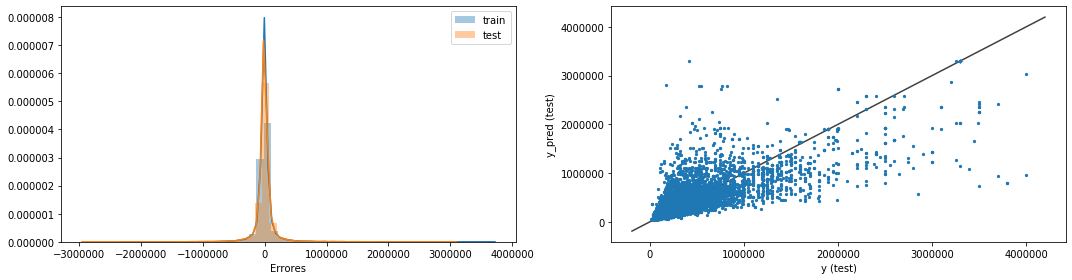

In [269]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.distplot(y_train - y_train_predict, bins = 50, label = 'train')
sns.distplot(y_test - y_test_predict, bins = 50, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s = 5)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
       ]
    
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Veamos en una gráfica cómo son las curvas del MAE de entrenamiento y de evaluación.

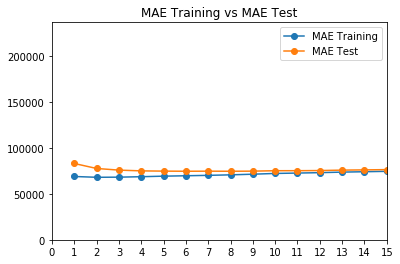

In [270]:
%matplotlib inline
plt.plot(range(1, 16, 1), mae_n_train, 'o-', label = 'MAE Training')
plt.plot(range(1, 16, 1), mae_n_test, 'o-', label = 'MAE Test')
plt.xticks(range(0, max(neighbors) + 1, 1))
plt.xlim((0, max(neighbors)))
plt.ylim((0, 237000))
plt.legend(loc = 'best')
plt.title('MAE Training vs MAE Test')
plt.show()

**Conclusiones sobre este modelo:**
- El número de vecinos adecuado para nuestro modelo es de 2. Como en el anterior modelo de vecinos más cercanos, conforme aumentamos este número las diferencias de los MAE disminuyen pero a partir de 2 lo hacen muy lentamente, por lo que se considera que aumentar los vecinos a partir de este punto nos podría dar una relación costo-beneficio desfavorable.
- Tomando como modelo <i>benchmark</i> este modelo con número de vecinos igual a 1, el modelo seleccionado (<b>n_neighbors = 2</b>) es mejor pues su MAE es menor.

In [271]:
print(f'{mae_n_test[1]} < {mae_n_test[0]}')

77743.61960009874 < 83173.89060314326


## Conclusiones

- Con las variables consideradas y la métrica empleada, <b>el modelo que mejor se aproxima a nuestros datos es nuevamente el árbol de decisión</b> pues su error es significativamente menor.

In [272]:
tree_3 = abs(mae_t_train[2] - mae_t_test[2])
knn_3 = abs(mae_n_train[1] - mae_n_test[1])

print(f'El error para el modelo de árbol de decisión es {tree_3}')
print(f'El error para el modelo de vecinos más cercanos es {knn_3}')

El error para el modelo de árbol de decisión es 1748.7659372095077
El error para el modelo de vecinos más cercanos es 9614.050876878318


<b>2.-</b> Veamos ahora cómo cambian nuestros modelos modificando las variables independientes. Veamos qué ocurre si consideramos únicamente la <i>superficie total</i> y <i>baños</i>, que son las que guardan más correlación con la variable objetivo.

In [273]:
X = filtered_df.drop(['price', 'rooms', 'bedrooms', 'surface_covered'], axis = 1)
y = filtered_df['price']

Como antes, separemos $X$ e $y$, tomando un 70% para entrenamiento y un 30% para evaluación.

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Veamos cómo cambia el modelo de <b>árbol de decisión</b>. Nuevamente, para determinar qué profundidad usaremos evaluaremos varias posibilidades.

In [275]:
mae_t_train = []
mae_t_test = []

depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for d in depth:
    tree_regressor = DecisionTreeRegressor(max_depth = d)
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    tree_mae_train = mean_absolute_error(y_train, y_train_pred)
    tree_mae_test = mean_absolute_error(y_test, y_test_pred)
    
    mae_t_train.append(tree_mae_train)
    mae_t_test.append(tree_mae_test)
    
print('El error absoluto promedio en el entrenamiento, para cada profunidad, es:\n')
print(mae_t_train)
print('El error absoluto promedio en la prueba, para cada profunidad, es:\n')
print(mae_t_test)

El error absoluto promedio en el entrenamiento, para cada profunidad, es:

[132825.6311100096, 107012.70404338503, 94377.17201883672, 88718.42708562176, 85293.41938167307, 83146.19228726739, 80550.16848143705, 78271.37953514821, 76498.55185825084, 74323.03651277185, 72365.70635278315, 70913.69094034699, 69676.91002436561, 68821.59836300634, 67967.91469135408]
El error absoluto promedio en la prueba, para cada profunidad, es:

[133375.81169153986, 107426.05842158869, 94153.84364451768, 88616.66300045094, 85709.91382325043, 84143.24672097298, 82131.72875724986, 80236.05637349878, 78936.07460226363, 78064.20883766653, 76632.43713352713, 76155.84847728099, 75565.1201710353, 75545.69199526131, 75381.1483285068]


Veamos ahora cómo es el histograma de los errores ($y - y_{predicho}$) así como el gráfico de dispersión de $y$ contra $y_{predicho}$ para el conjunto de test.

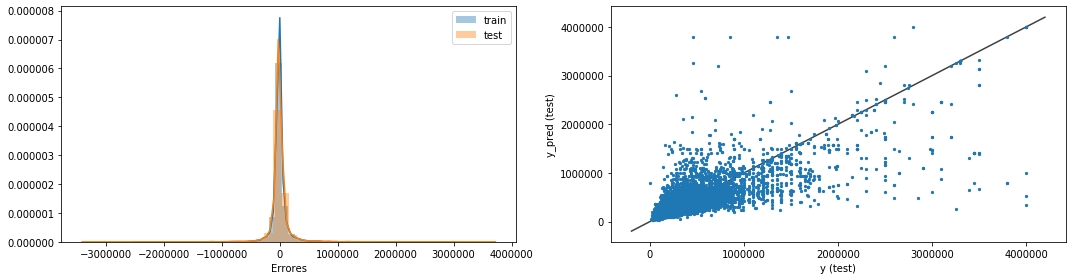

In [276]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s = 5)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
       ]
    
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Veamos en una gráfica cómo son las curvas del MAE de entrenamiento y de evaluación.

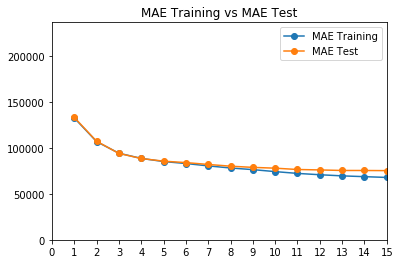

In [277]:
%matplotlib inline
plt.plot(range(1, 16, 1), mae_t_train, 'o-', label = 'MAE Training')
plt.plot(range(1, 16, 1), mae_t_test, 'o-', label = 'MAE Test')
plt.xticks(range(0,max(depth) + 1, 1))
plt.xlim((0, max(depth)))
plt.ylim((0, 237000))
plt.legend(loc = 'best')
plt.title('MAE Training vs MAE Test')
plt.show()

**Conclusiones sobre este modelo:**
- Como en el anterior árbol de decisión, la mejor profundidad es de 3.
- Nuevamente, tomando como modelo <i>benchmark</i> el árbol de decisión con profundidad 1, evidentemente el modelo seleccionado (<b>depth = 3</b>) es mejor.

In [278]:
print(f'{mae_t_test[2]} < {mae_t_test[0]}')

94153.84364451768 < 133375.81169153986


Ahora, tomemos el modelo de <b>vecinos más cercanos</b>. Para determinar el número óptimo de vecinos, evaluaremos varias posibilidades.

In [279]:
mae_train = []
mae_test = []

neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors = n)
    knn_regressor.fit(X_train, y_train)
    
    y_train_predict = knn_regressor.predict(X_train)
    y_test_predict = knn_regressor.predict(X_test)
    
    knn_mae_train = mean_absolute_error(y_train, y_train_predict)
    knn_mae_test = mean_absolute_error(y_test, y_test_predict)
    
    mae_train.append(knn_mae_train)
    mae_test.append(knn_mae_test)
    
print('El error absoluto promedio en el entrenamiento, para cada número de vecinos, es:\n')
print(mae_train)
print('El error absoluto promedio en la prueba, para cada número de vecinos, es:\n')
print(mae_test)

El error absoluto promedio en el entrenamiento, para cada número de vecinos, es:

[85334.3191155467, 81262.62334914393, 79488.32922492785, 78091.63115158782, 77383.59218168673, 77528.56329530559, 77539.1847170339, 77279.26771860068, 77563.32926215233, 77676.45058099554, 77999.48039490706, 78105.05644355497, 78531.82523610786, 78747.86053084326, 78738.34816708692]
El error absoluto promedio en la prueba, para cada número de vecinos, es:

[94688.6439973669, 87573.09518225952, 84568.67108258592, 82522.21656175429, 81596.89138484324, 81516.80181848104, 81384.92827167895, 81126.75526104665, 81130.28906899989, 81015.77882004443, 81198.95574979615, 81104.58407731973, 81452.17995556652, 81461.19648881521, 81391.11159658794]


Veamos ahora cómo es el histograma de los errores ($y - y_{predicho}$) así como el gráfico de dispersión de $y$ contra $y_{predicho}$ para el conjunto de test.

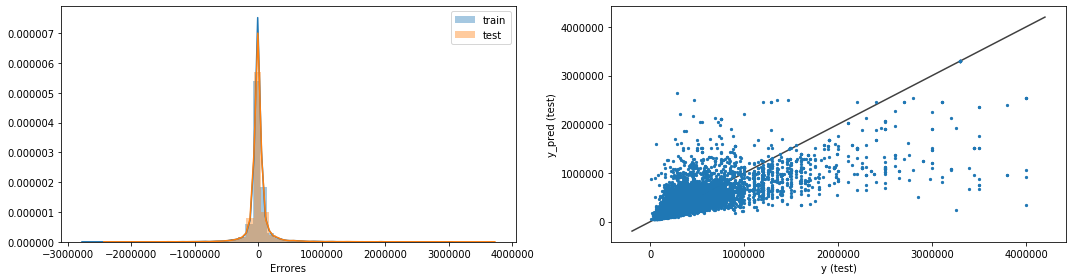

In [280]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.distplot(y_train - y_train_predict, bins = 50, label = 'train')
sns.distplot(y_test - y_test_predict, bins = 50, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s = 5)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
       ]
    
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Veamos en una gráfica cómo son las curvas del MAE de entrenamiento y de evaluación.

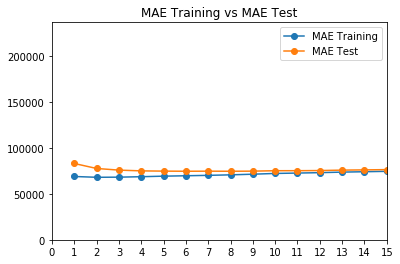

In [281]:
%matplotlib inline
plt.plot(range(1, 16, 1), mae_n_train, 'o-', label = 'MAE Training')
plt.plot(range(1, 16, 1), mae_n_test, 'o-', label = 'MAE Test')
plt.xticks(range(0, max(neighbors) + 1, 1))
plt.xlim((0, max(neighbors)))
plt.ylim((0, 237000))
plt.legend(loc = 'best')
plt.title('MAE Training vs MAE Test')
plt.show()

**Conclusiones sobre este modelo:**
- El número de vecinos adecuado para nuestro modelo es de 2. Como en el anterior modelo de vecinos más cercanos, conforme aumentamos este número las diferencias de los MAE disminuyen pero a partir de 5 lo hacen muy lentamente, por lo que se considera que aumentar los vecinos a partir de este punto nos podría dar una relación costo-beneficio desfavorable.
- Tomando como modelo <i>benchmark</i> este modelo con número de vecinos igual a 1, el modelo seleccionado (<b>n_neighbors = 2</b>).

In [282]:
print(f'{mae_n_test[1]} < {mae_n_test[0]}')

77743.61960009874 < 83173.89060314326


## Conclusiones

- Con las variables consideradas y la métrica empleada, nuevamente <b>el modelo de árbol de decisión es el que mejor se aproxima a nuestros datos</b> pues su error es menor.

In [283]:
tree_2 = abs(mae_t_test[2] - mae_t_train[2])
knn_2 = abs(mae_n_test[1] - mae_n_train[1])

print(f'El error para el modelo de árbol de decisión es {tree_2}')
print(f'El error para el modelo de vecinos más cercanos es {knn_2}')

El error para el modelo de árbol de decisión es 223.32837431904045
El error para el modelo de vecinos más cercanos es 9614.050876878318


<b>3.-</b> Veamos ahora qué ocurre si consideramos únicamente la <i>superficie total</i>, que es la que guarda más correlación con la variable objetivo.

In [284]:
X = filtered_df.drop(['price', 'rooms', 'bedrooms', 'bathrooms', 'surface_covered'], axis = 1)
y = filtered_df['price']

Como antes, separemos $X$ e $y$, tomando un 70% para entrenamiento y un 30% para evaluación.

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Nuestro primer modelo será un <b>árbol de decisión</b>. Para determinar qué profundidad usaremos, evaluaremos varias posibilidades.

In [286]:
mae_t_train = []
mae_t_test = []

depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for d in depth:
    tree_regressor = DecisionTreeRegressor(max_depth = d)
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    tree_mae_train = mean_absolute_error(y_train, y_train_pred)
    tree_mae_test = mean_absolute_error(y_test, y_test_pred)
    
    mae_t_train.append(tree_mae_train)
    mae_t_test.append(tree_mae_test)
    
print('El error absoluto promedio en el entrenamiento, para cada profunidad, es:\n')
print(mae_t_train)
print('El error absoluto promedio en la prueba, para cada profunidad, es:\n')
print(mae_t_test)

El error absoluto promedio en el entrenamiento, para cada profunidad, es:

[132921.10898954506, 111061.75760230624, 99738.50082507376, 95566.70572309861, 93691.41874605617, 91302.07129348452, 89925.57405385678, 89021.88207481975, 88124.42035913018, 87038.70296589688, 86155.9094205546, 85618.02878145404, 85168.4022121923, 84901.45496026467, 84716.15889465118]
El error absoluto promedio en la prueba, para cada profunidad, es:

[133408.94875714168, 110880.96004152486, 99391.85284795576, 95316.86412328479, 94140.93228044653, 91787.27465345469, 90839.40059513254, 89713.36140884548, 88944.76915950919, 88679.05625220372, 88159.16025012842, 88056.35177723323, 87733.77429684099, 87689.4589468776, 87587.73601002707]


Veamos ahora cómo es el histograma de los errores ($y - y_{predicho}$) así como el gráfico de dispersión de $y$ contra $y_{predicho}$ para el conjunto de test.

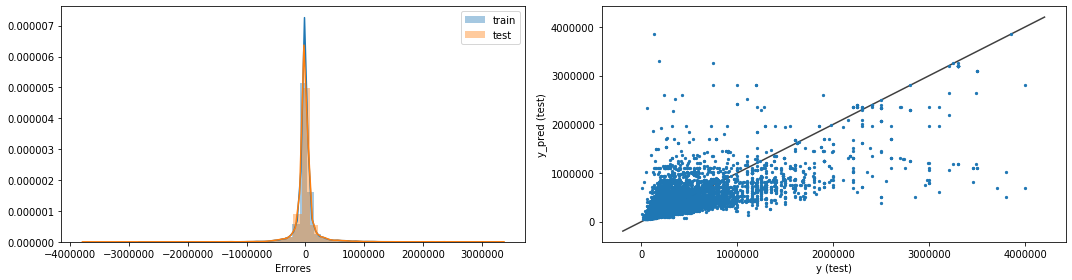

In [287]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.distplot(y_train - y_train_pred, bins = 50, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 50, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s = 5)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
       ]
    
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Veamos en una gráfica cómo son las curvas del MAE de entrenamiento y de evaluación.

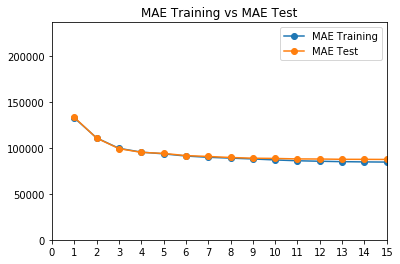

In [288]:
%matplotlib inline
plt.plot(range(1, 16, 1), mae_t_train, 'o-', label = 'MAE Training')
plt.plot(range(1, 16, 1), mae_t_test, 'o-', label = 'MAE Test')
plt.xticks(range(0,max(depth) + 1, 1))
plt.xlim((0, max(depth)))
plt.ylim((0, 237000))
plt.legend(loc = 'best')
plt.title('MAE Training vs MAE Test')
plt.show()

**Conclusiones sobre este modelo:**
- Como en el anterior árbol de decisión, se considera que la mejor profundidad es de 3.
- Nuevamente, tomando como modelo <i>benchmark</i> el árbol de decisión con profundidad 1, evidentemente el modelo seleccionado (<b>depth = 3</b>) es mejor.

In [289]:
print(f'{mae_t_test[2]} < {mae_t_test[0]}')

99391.85284795576 < 133408.94875714168


Ahora, como segundo modelo tomaremos el de <b>vecinos más cercanos</b>. Para determinar el número óptimo de vecinos, evaluaremos varias posibilidades.

In [290]:
mae_n_train = []
mae_n_test = []

neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors = n)
    knn_regressor.fit(X_train, y_train)
    
    y_train_predict = knn_regressor.predict(X_train)
    y_test_predict = knn_regressor.predict(X_test)
    
    knn_mae_train = mean_absolute_error(y_train, y_train_predict)
    knn_mae_test = mean_absolute_error(y_test, y_test_predict)
    
    mae_n_train.append(knn_mae_train)
    mae_n_test.append(knn_mae_test)
    
print('El error absoluto promedio en el entrenamiento, para cada número de vecinos, es:\n')
print(mae_n_train)
print('El error absoluto promedio en la prueba, para cada número de vecinos, es:\n')
print(mae_n_test)

El error absoluto promedio en el entrenamiento, para cada número de vecinos, es:

[111632.54980339605, 100647.88202881174, 95944.17114829639, 93262.22236083438, 92692.34112460987, 92558.42155237777, 91529.86443269494, 91344.68377620651, 90366.88743909392, 90243.32229471198, 90670.30936469593, 90379.82467276754, 90652.28572610539, 90432.58113156218, 89899.28417470423]
El error absoluto promedio en la prueba, para cada número de vecinos, es:

[114966.03929071012, 103524.26705340245, 98628.44541814094, 95330.58358018596, 95072.54081296799, 94567.93482404892, 93338.49634423011, 93333.47609129433, 92310.71419951177, 92067.11172961407, 92480.12832596515, 92037.36600016456, 92127.01219388691, 91923.5483596055, 91317.94170986587]


Veamos ahora cómo es el histograma de los errores ($y - y_{predicho}$) así como el gráfico de dispersión de $y$ contra $y_{predicho}$ para el conjunto de test.

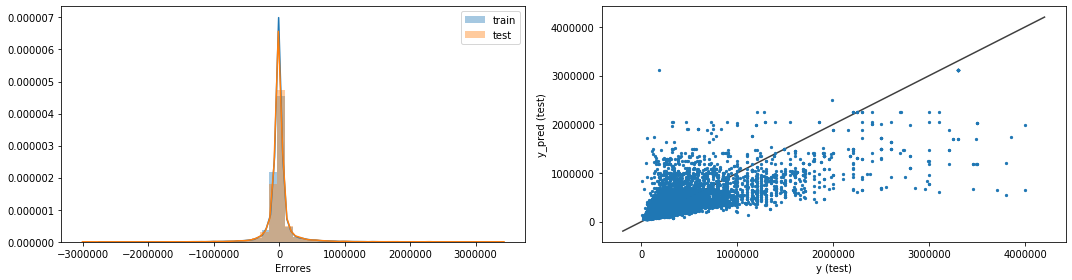

In [291]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.distplot(y_train - y_train_predict, bins = 50, label = 'train')
sns.distplot(y_test - y_test_predict, bins = 50, label = 'test')
plt.xlabel('Errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s = 5)
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()])
       ]
    
ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Veamos en una gráfica cómo son las curvas del MAE de entrenamiento y de evaluación.

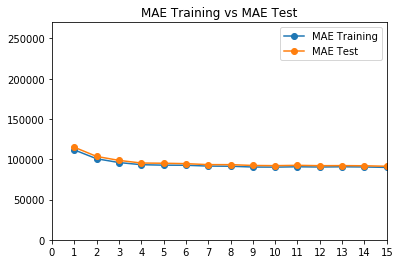

In [292]:
%matplotlib inline
plt.plot(range(1, 16, 1), mae_n_train, 'o-', label = 'MAE Training')
plt.plot(range(1, 16, 1), mae_n_test, 'o-', label = 'MAE Test')
plt.xticks(range(0, max(neighbors) + 1, 1))
plt.xlim((0, max(neighbors)))
plt.ylim((0, 270000))
plt.legend(loc = 'best')
plt.title('MAE Training vs MAE Test')
plt.show()

**Conclusiones sobre este modelo:**
- El número de vecinos adecuado para nuestro modelo es nuevamente 2. Como en el anterior modelo de vecinos más cercanos, conforme aumentamos este número las diferencias de los MAE disminuyen pero a partir de 5 lo hacen muy lentamente, por lo que se considera que aumentar los vecinos a partir de este punto nos podría dar una relación costo-beneficio desfavorable.
- Tomando como modelo <i>benchmark</i> este modelo con número de vecinos igual a 1, el modelo seleccionado (<b>n_neighbors = 2</b>) es mejor.

In [293]:
print(f'{mae_n_test[1]} < {mae_n_test[0]}')

103524.26705340245 < 114966.03929071012


## Conclusiones

- De nuevo, con las variables y la métrica consideradas, <b>el modelo de árbol de decisión es el que mejor se aproxima a nuestros datos</b> pues su error es menor.

In [294]:
tree_1 = abs(mae_t_train[2] - mae_t_test[2])
knn_1 = abs(mae_n_train[1] - mae_n_test[1])

print(f'El error para el modelo de árbol de decisión es {tree_1}')
print(f'El error para el modelo de vecinos más cercanos es {knn_1}')

El error para el modelo de árbol de decisión es 346.647977118002
El error para el modelo de vecinos más cercanos es 2876.385024590709


# Conclusiones finales

In [296]:
dictionary = {'Variables' : [5, 5, 3, 3, 2, 2, 1, 1],
             'Error' : [tree_5, knn_5, tree_3, knn_3, tree_2, knn_2, tree_1, knn_1],
             'Modelo' : ['Árbol', 'Vecinos', 'Árbol', 'Vecinos', 'Árbol', 'Vecinos', 'Árbol', 'Vecinos',]}

conclusiones = pd.DataFrame(dictionary)
conclusiones

,Variables,Error,Modelo
0,5,421.340964,Árbol
1,5,14070.539197,Vecinos
2,3,1748.765937,Árbol
3,3,9614.050877,Vecinos
4,2,223.328374,Árbol
5,2,9614.050877,Vecinos
6,1,346.647977,Árbol
7,1,2876.385025,Vecinos


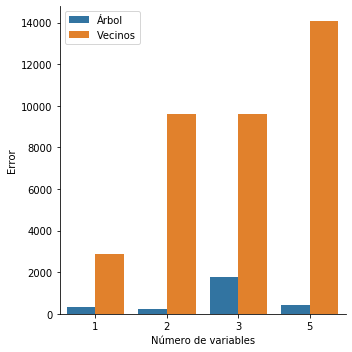

In [297]:
sns.catplot(x = 'Variables', y = 'Error', hue = 'Modelo', kind = 'bar', data = conclusiones, legend = False)
plt.xlabel('Número de variables')
plt.ylabel('Error')
plt.legend(loc = 'best')

- <b>El mejor modelo</b> de entre todos los estudiados fue <b>el árbol de decisión, tomando como variables independientes las dos más correlacionadas con la variable objetivo</b>.
- Es de notar que la exactitud de este modelo es muy similar a la del árbol de decisión que consideró solamente la varibale más correlacionada con la variable objetivo. En este caso, el costo de considerar las dos variables es el mismo que en el caso de una, pero de otra manera posiblemente nuestro mejor modelo hubiese sido el que considera sólo <i>superficie total</i>.
- No importando las variables independientes tomadas en cuenta, en todos los modelos estudiados aquí el que resultó mejor, por mucho, fue el de árboles de decisión.
- Durante el análisis se notó que al correr dos o más veces cada modelo podría cambiar la elección de la profundidad óptima del árbol o el número óptimo de vecinos, aunque en sólo en +/- 1 hasta donde se observó y sin repercutir en la conclusión de la idoneidad del modelo de árbol de decisión sobre el de vecinos más cercanos.
- Se considera que la modificación del número de variables en los modelos estudiados no impactó significativamente en la exactitud de los mismos.
- Con más datos relevantes (como algunos de los considerados al principio de este proyecto y que no están presentes en la base de datos) muy probablemente nuestros modelos serían optimizados.